# AIDM 7330 Basic Programming for Data Science Final Project
# Topic: Netflix
## Group name: Hello, world
## Student name and number:
### HUANG Liang 22465693
### CAI Wenxin 22439315
### LIANG Xinyi 22448756



In [1]:
# Data analysis Package and drawing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the canvas size
sns.set_context({'figure.figsize':[40, 20]})

In [2]:
df = pd.read_csv('NetflixOriginals.csv',encoding='unicode_escape')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [3]:
def apply_func(x):
    if not x or type(x) != str:
        return []
    return [it.strip() for it in x.split('/')]

# The genre in the raw data is multi-label, which is splitting them into lists.
df["genres"] = df["Genre"].apply(apply_func)
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,genres
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,[Documentary]
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,[Thriller]
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"[Science fiction, Drama]"
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,[Horror thriller]
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,[Mystery]
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,[Concert Film]
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,[Documentary]
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,[One-man show]
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,[Documentary]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


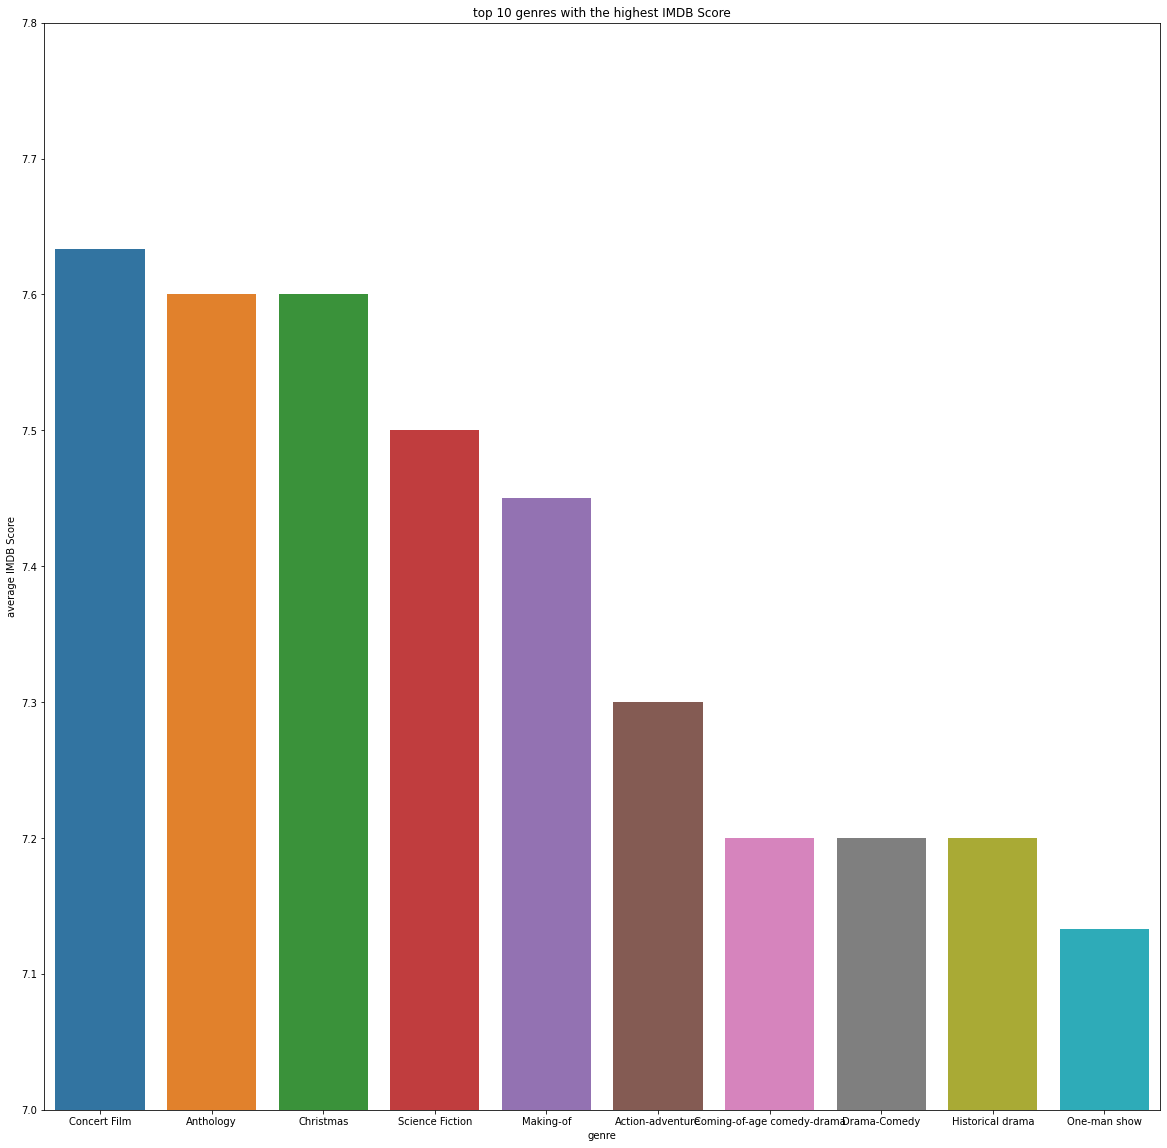

In [4]:
# For question， 1.Which are the top 10 genre movies/ TV shows with the highest IMDB Score?
# Setting canvas size
sns.set_context({'figure.figsize':[20, 20]})

# statistics of the occurrence Dict between genres and IMDB Scores
genre2score = {}
for i, row in df.iterrows():
    genre_list = row["genres"]
    score = float(row["IMDB Score"])
    for genre in genre_list:
        if genre not in genre2score:
            genre2score[genre] = []
        genre2score[genre].append(score)

# get the top10 genres sorted by average IMDB Score        
genre2score = dict(sorted(genre2score.items(), key=lambda x: (-sum(x[1]) / len(x[1]), x[0]))[:10])

        
# draw our result
x = list(genre2score.keys())
y = [sum(group) / len(group) for group in genre2score.values()]
fig = sns.barplot(x, y)
fig.set_title("top 10 genres with the highest IMDB Score")
fig.set_xlabel("genre")
fig.set_ylabel("average IMDB Score")
plt.ylim(7., 7.8)
plt.savefig('top10genres.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


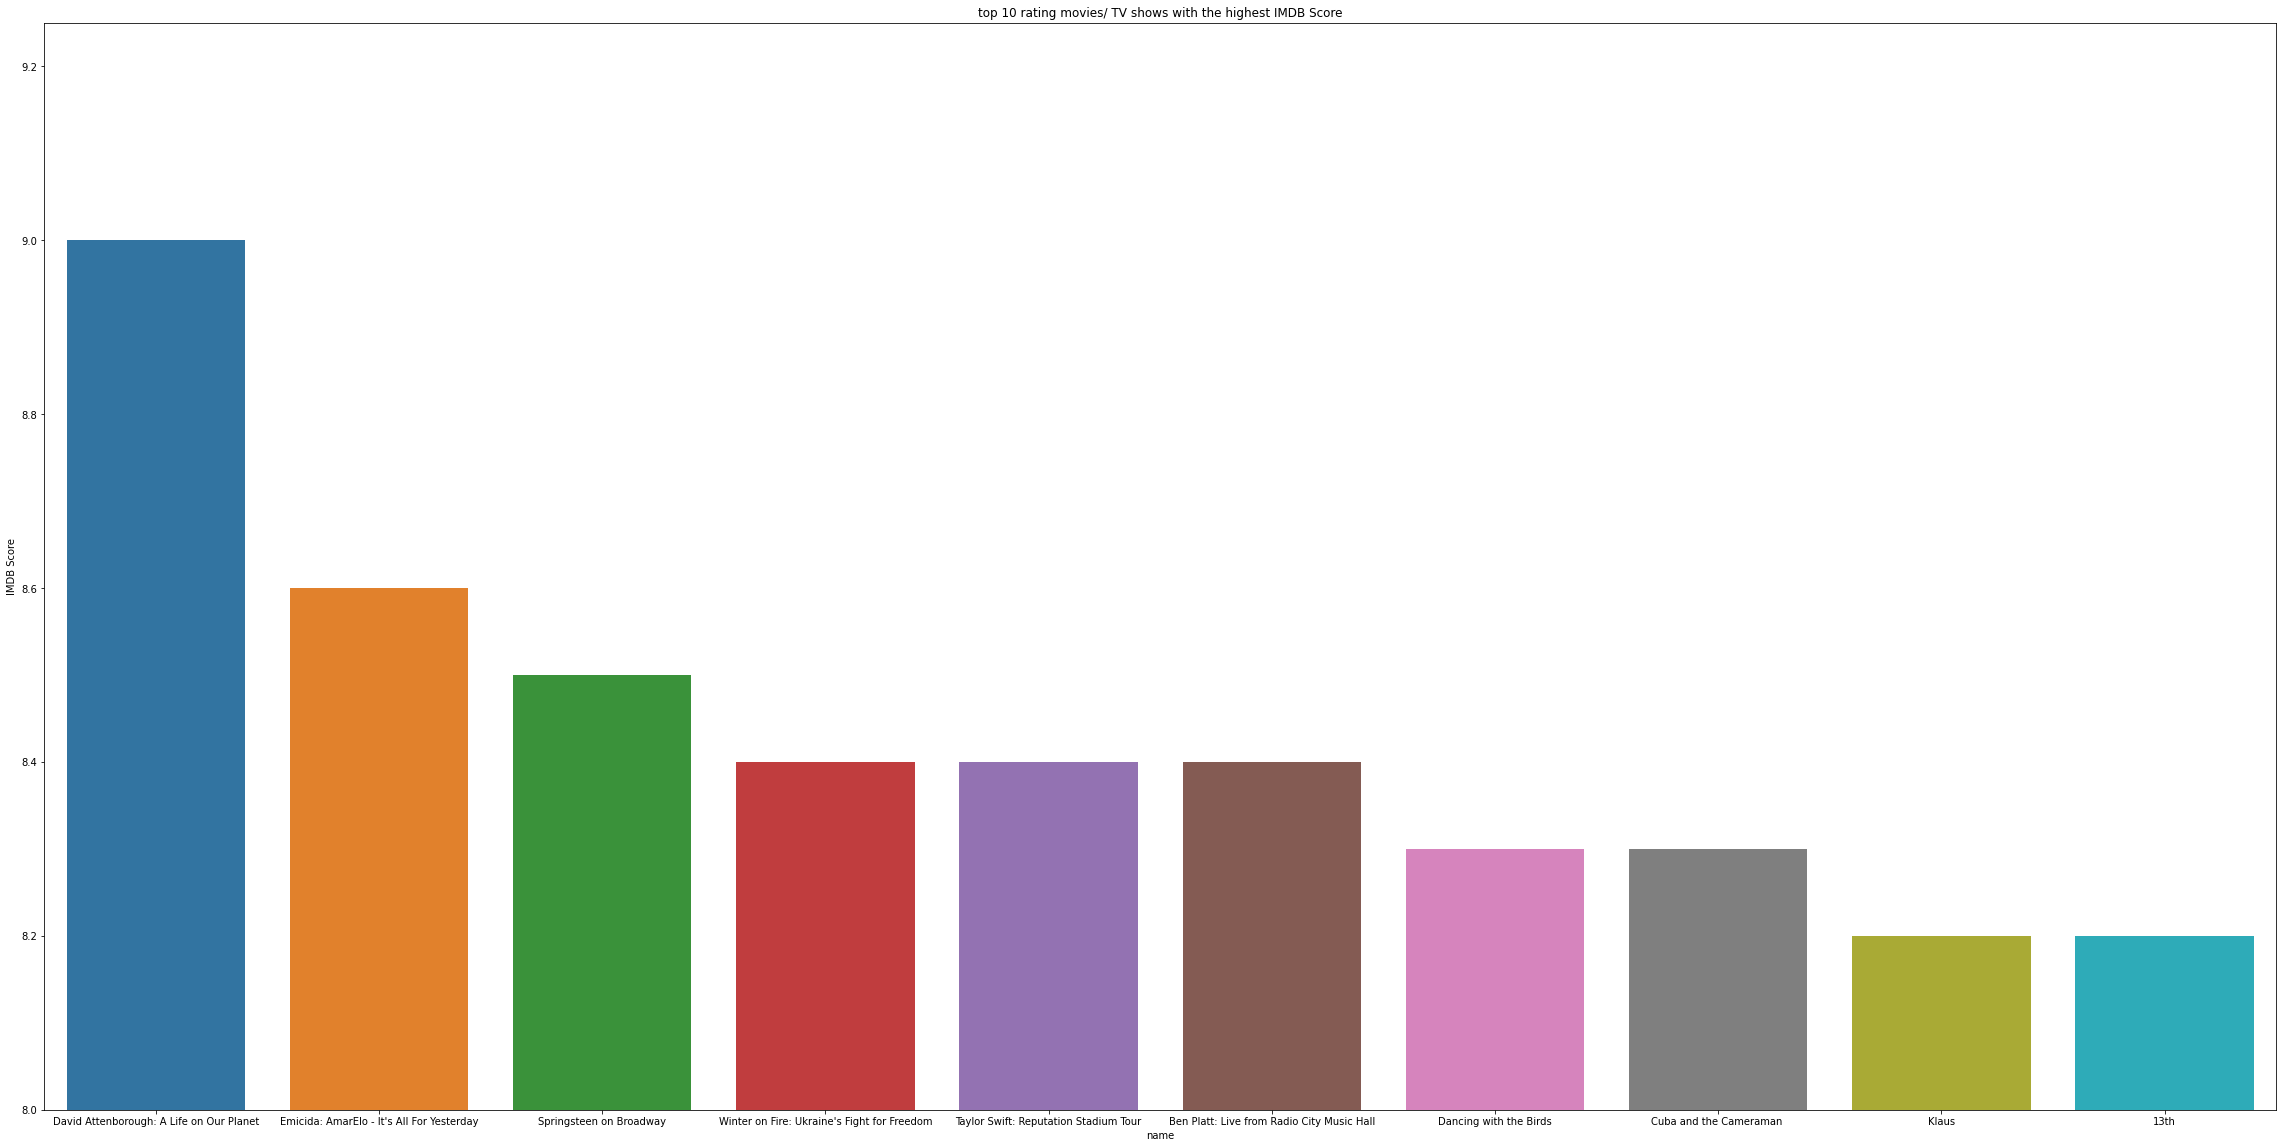

In [5]:
# Which are the top 10 rating movies/ TV shows with the highest IMDB Score?
# Set canvas size
sns.set_context({'figure.figsize':[40, 20]})

# get top10 movies sorted by IMDB Score
df = df.sort_values("IMDB Score", ascending=False)[:10]

# Draw our result
x = list(df["Title"].to_list())
y = list(df["IMDB Score"].to_list())

fig = sns.barplot(x, y)
fig.set_title("top 10 rating movies/ TV shows with the highest IMDB Score")
fig.set_xlabel("name")
fig.set_ylabel("IMDB Score")
plt.ylim(8, 9.25)
plt.savefig('top10movies.png')
plt.show()

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
#First read the data
data = pd.read_csv('NetflixOriginals.csv',encoding='unicode_escape')
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [8]:
#Check the columns of the data
data.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [9]:
#Check data type
data.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [10]:
data['Genre'].value_counts()[0:10]

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: Genre, dtype: int64

In [11]:
top_five_class = data['Genre'].value_counts()[0:5].index.to_list()
top_five_class

['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


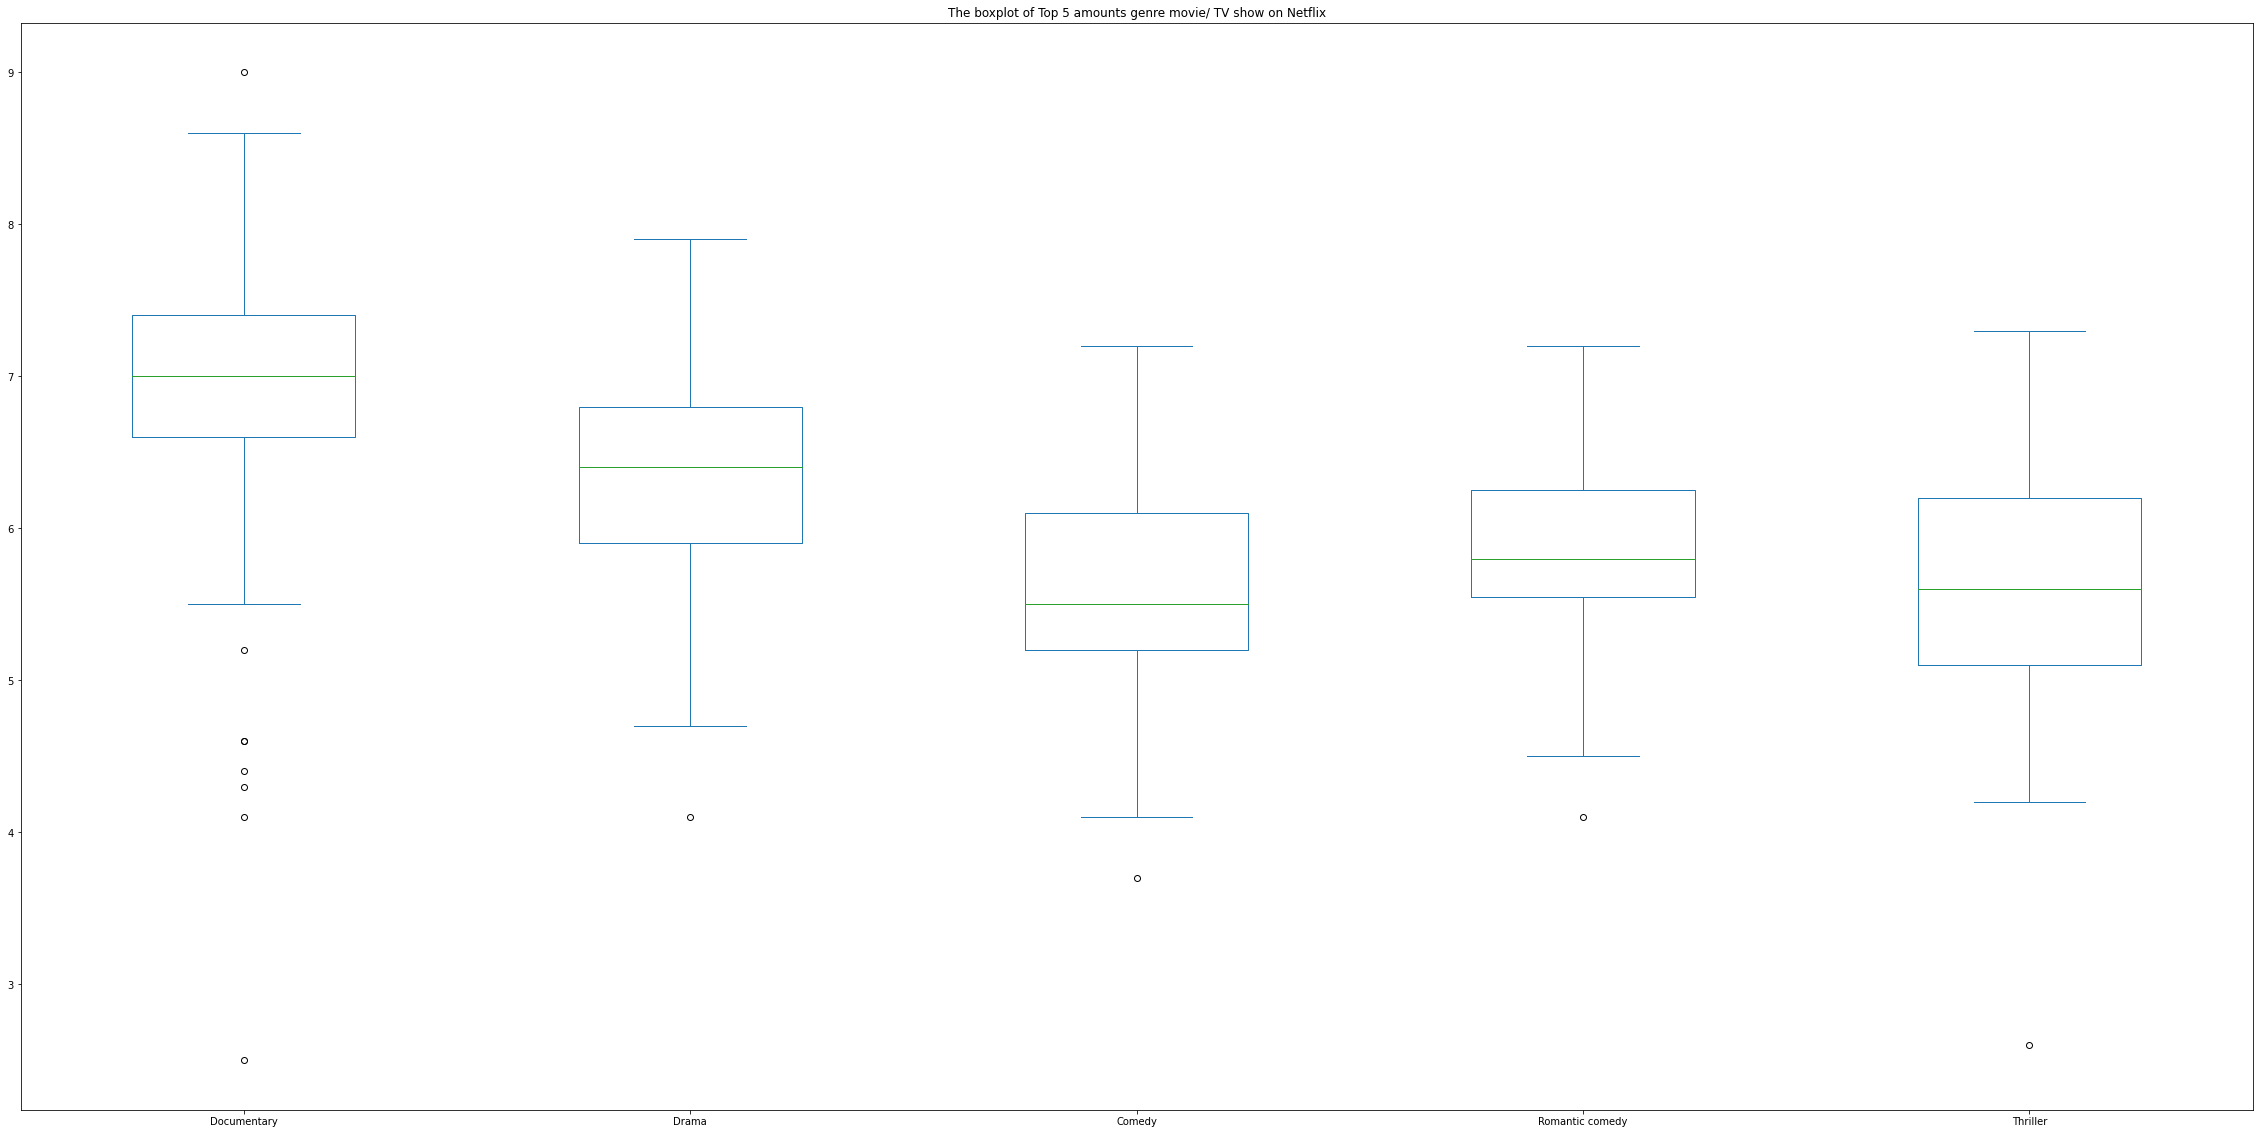

In [14]:
# Plotting a boxplot of the top five IMDB scores
doc = data.groupby(['Genre']).get_group('Documentary')['IMDB Score']
drama = data.groupby(['Genre']).get_group('Drama')['IMDB Score']
comedy = data.groupby(['Genre']).get_group('Comedy')['IMDB Score']
romantic_comedy = data.groupby(['Genre']).get_group('Romantic comedy')['IMDB Score']
thriller = data.groupby(['Genre']).get_group('Thriller')['IMDB Score']
result = pd.DataFrame({
    'Documentary':doc,
    'Drama':drama,
    'Comedy':comedy,
    'Romantic comedy':romantic_comedy,
    'Thriller':thriller
})
result.plot.box(title = 'The boxplot of Top 5 amounts genre movie/ TV show on Netflix')


In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing


import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)

import seaborn as sns

In [16]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
df.info()

In [18]:
# count the amount of movies/ TV shows on Netflix among different countries
country = df['country']
# Remove all rows wit NULL values from the DataFrame
country = country.dropna()

# The join() fuction method takes all items in an iterable and joins them into one string. 
countryall = ", ".join(country)
countryall = countryall.replace(',, ',', ')

# The split() method splits a string into a list
countryall = countryall.split(", ")

# make the all countries with the frequency into a list
countryall = list(Counter(countryall).items())

print(countryall)
print(country)

[('South Korea', 155), ('India', 753), ('France', 255), ('Senegal', 2), ('Belgium', 63), ('Canada', 300), ('United Kingdom', 559), ('Nigeria', 26), ('South Africa', 26), ('United States', 2421), ('Spain', 173), ('Colombia', 36), ('Mexico', 122), ('Japan', 216), ('Brazil', 63), ('Germany', 135), ('Norway', 20), ('Poland', 25), ('China', 117), ('United Arab Emirates', 21), ('Singapore', 29), ('Australia', 121), ('Italy', 63), ('New Zealand', 21), ('Argentina', 66), ('Taiwan', 73), ('Finland', 8), ('Chile', 23), ('Peru', 9), ('Ireland', 33), ('Thailand', 56), ('Turkey', 86), ('Hong Kong', 96), ('Liechtenstein', 1), ('Israel', 25), ('Switzerland', 15), ('Russia', 21), ('Malaysia', 20), ('Luxembourg', 7), ('Egypt', 53), ('Austria', 9), ('Netherlands', 36), ('Indonesia', 50), ('Czech Republic', 15), ('Denmark', 37), ('West Germany', 4), ('Malta', 2), ('Vietnam', 4), ('Pakistan', 23), ('Portugal', 4), ('Sweden', 32), ('Philippines', 46), ('Lebanon', 9), ('Bulgaria', 7), ('Dominican Republic',

In [19]:
# input the country code dataset for simpler reading
df1=pd.read_csv('country_code.csv')

# drop the "Unnamed: 2" column because there is just one country (gambia) has this column
df1=df1.drop(columns=['Unnamed: 2']) 

df1.head()

,COUNTRY,CODE
0,afghanistan,AFG
1,albania,ALB
2,algeria,DZA
3,american samoa,ASM
4,andorra,AND


In [20]:
# create worldmap Dataframe
worldmap = pd.DataFrame(countryall) 

# order countries in descending order
worldmap = worldmap.sort_values(1,ascending=False)

location = pd.DataFrame(columns = ['CODE']) 
country_name = df1['COUNTRY']

# Using for loop to input every country in the world map
for n in worldmap[0]:
    x=df1[country_name.str.contains(n,case=False)] 
    # x present the country code
    x['CODE']
    # Using the append() function to make every country code into the 'location'
    location=location.append(x)

print(location)

     CODE         COUNTRY
211   USA   united states
92    IND           india
210   GBR  united kingdom
37    CAN          canada
70    FRA          france
..    ...             ...
156   PRY        paraguay
1     ALB         albania
207   UGA          uganda
38    CYM  cayman islands
59    ECU         ecuador

[107 rows x 2 columns]


In [21]:
# make the 'locations' a empty list
locations=[]
temp=location['CODE']

# Using for loop and append() function to make every code into the 'locations'
for i in temp:
    locations.append(i.replace(' ',''))

In [22]:
# Data visualization
# A Choropleth type is composed of colored polygons. It is used to represent spatial variations of a quantity. 
# colorscale ref: https://www.webucator.com/article/python-color-constants-module/
# We divided the whole scale into 5 parts to clearly see the distribution
data = [dict( type = 'choropleth', locations=locations,z=list(worldmap[1]),colorscale = [[0,"rgb(139,119,101)"],[0.25,"rgb(205,175,149)"],
                      [0.50,"rgb(238,203,173)"],[0.75,"rgb(255,218,185)"],[1,"rgb(255,239,213)"]], autocolorscale = False,reversescale = True)]

# Add a title                    
layout = dict(title = 'Netflix movie/TV shows among different countries world map' )   
fig = dict( data=data, layout=layout )

# show the world map
iplot( fig )


# **Report**
Netflix is the biggest media streaming platform in the world. We want to visualize this topic and explore some interesting findings. And we set 4 questions for our exploration.

For the Q1, which are the top 10 genre movies/TV shows with the highset IMDB score? Firstly we should set the canvas size, then we can start processing the data. 

By finding the statistics of the occurence dict between genres and IMDB scores, we can get our results. 

From the histogram1, we can see that the top 10 genre are Concert film, Anthology, Christmas, Science Fiction, Making-of, Action adventure, comedy-drama, historical drama and one-man show.
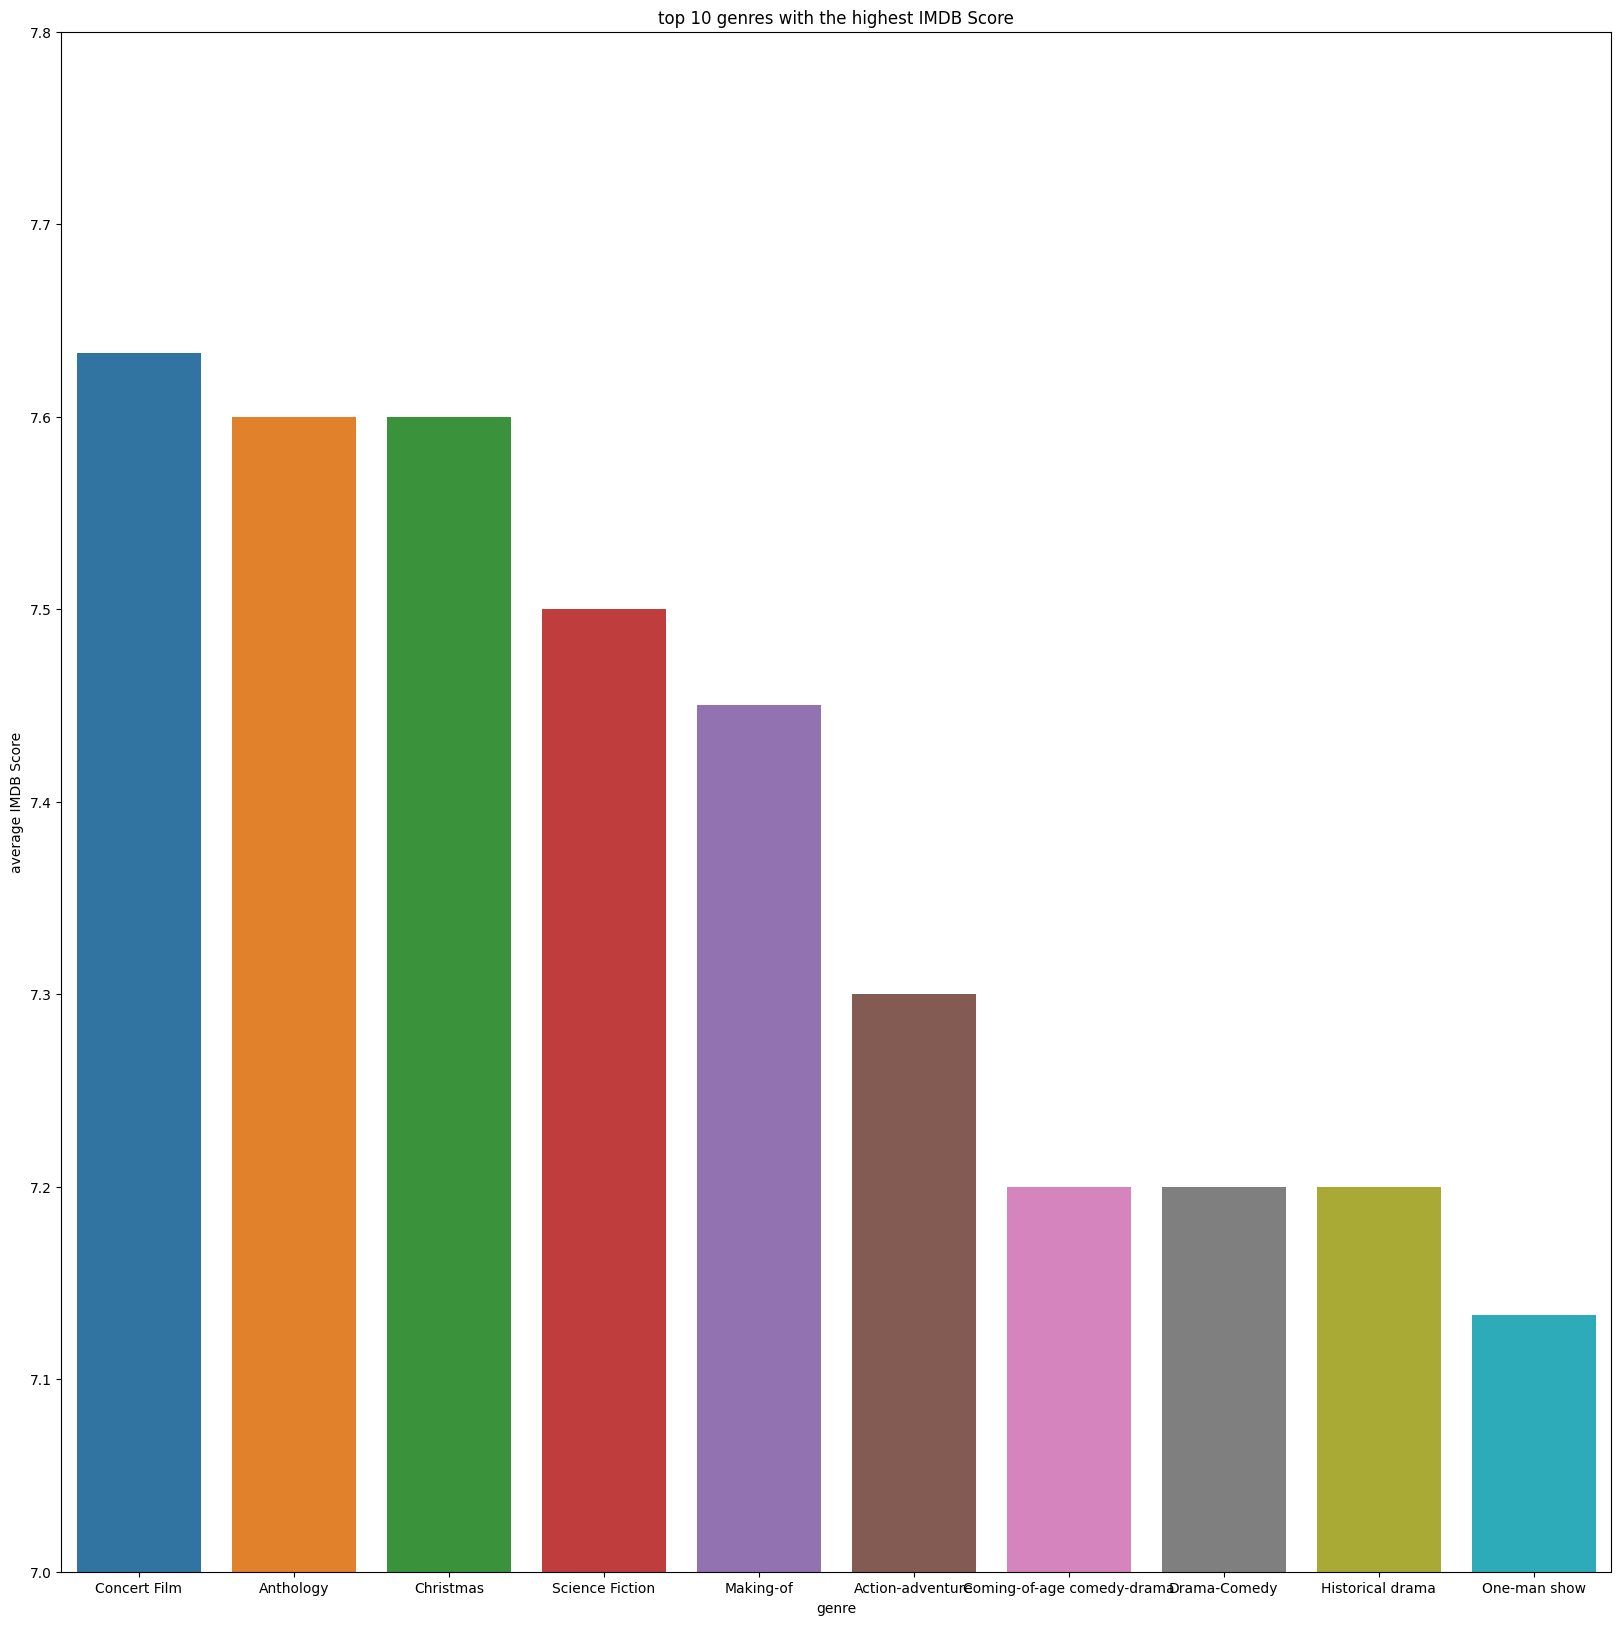
Similarly for the Q2, Which are the top 10 rating movies/ TV shows with the highest IMDB Score? After processing the data and visualization, we can see that the top10 rating are David Attenboroough, Emicida, Springsteen, Winter,Taylor Swift, Ben platt,Dacing with the birds, Cuba, Klaus and 13th.
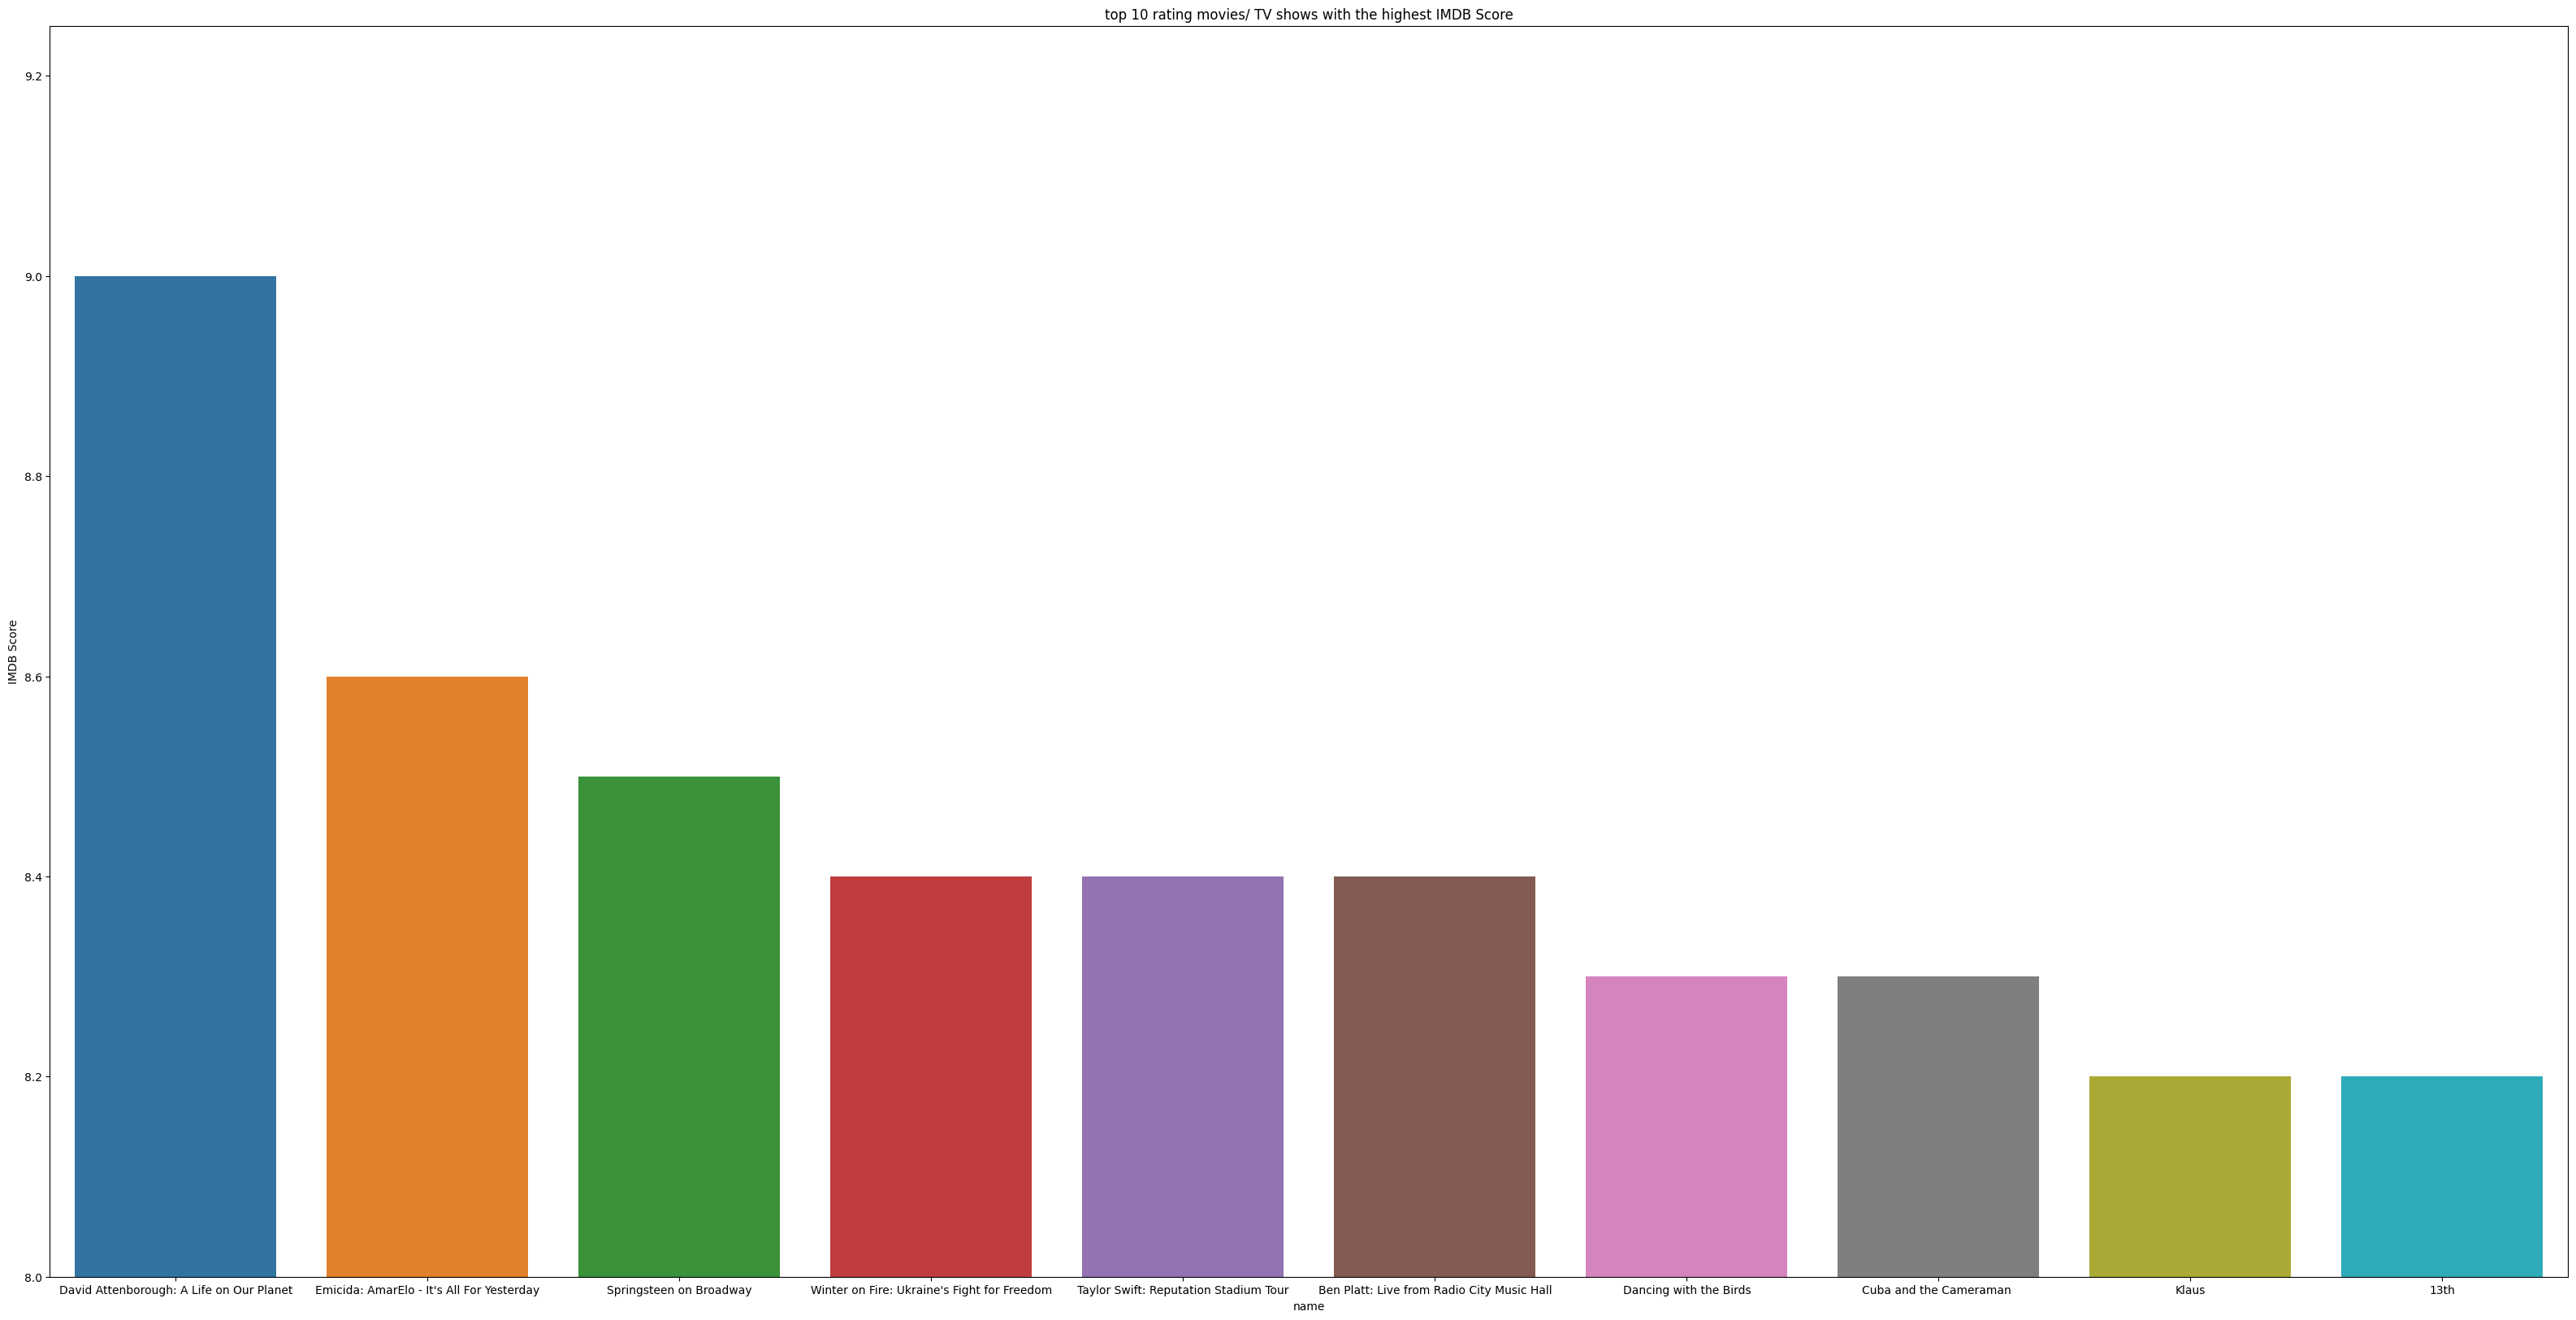

For the Q3: What is the correlation between IMDB score and 'Runtime'? It can be seen that the IMDB scores of Documentary movies are generally the highest, around 7 points. But it also has the most outliers.


Followed by drama, romantic comedy, thriller, comedy.

In conclusion, it can be seen that it is easier to get a high IMDB score for the Documentary movie category, but it will also get a low score if it is not done well. Romantic comedies are more likely to get high marks than comedies.

The three outliers in the figure are from the Documentary's IMDB score of 9 (the highest value) and 2.5 points (the lowest value) and the thriller's IMDB score of 2.6.

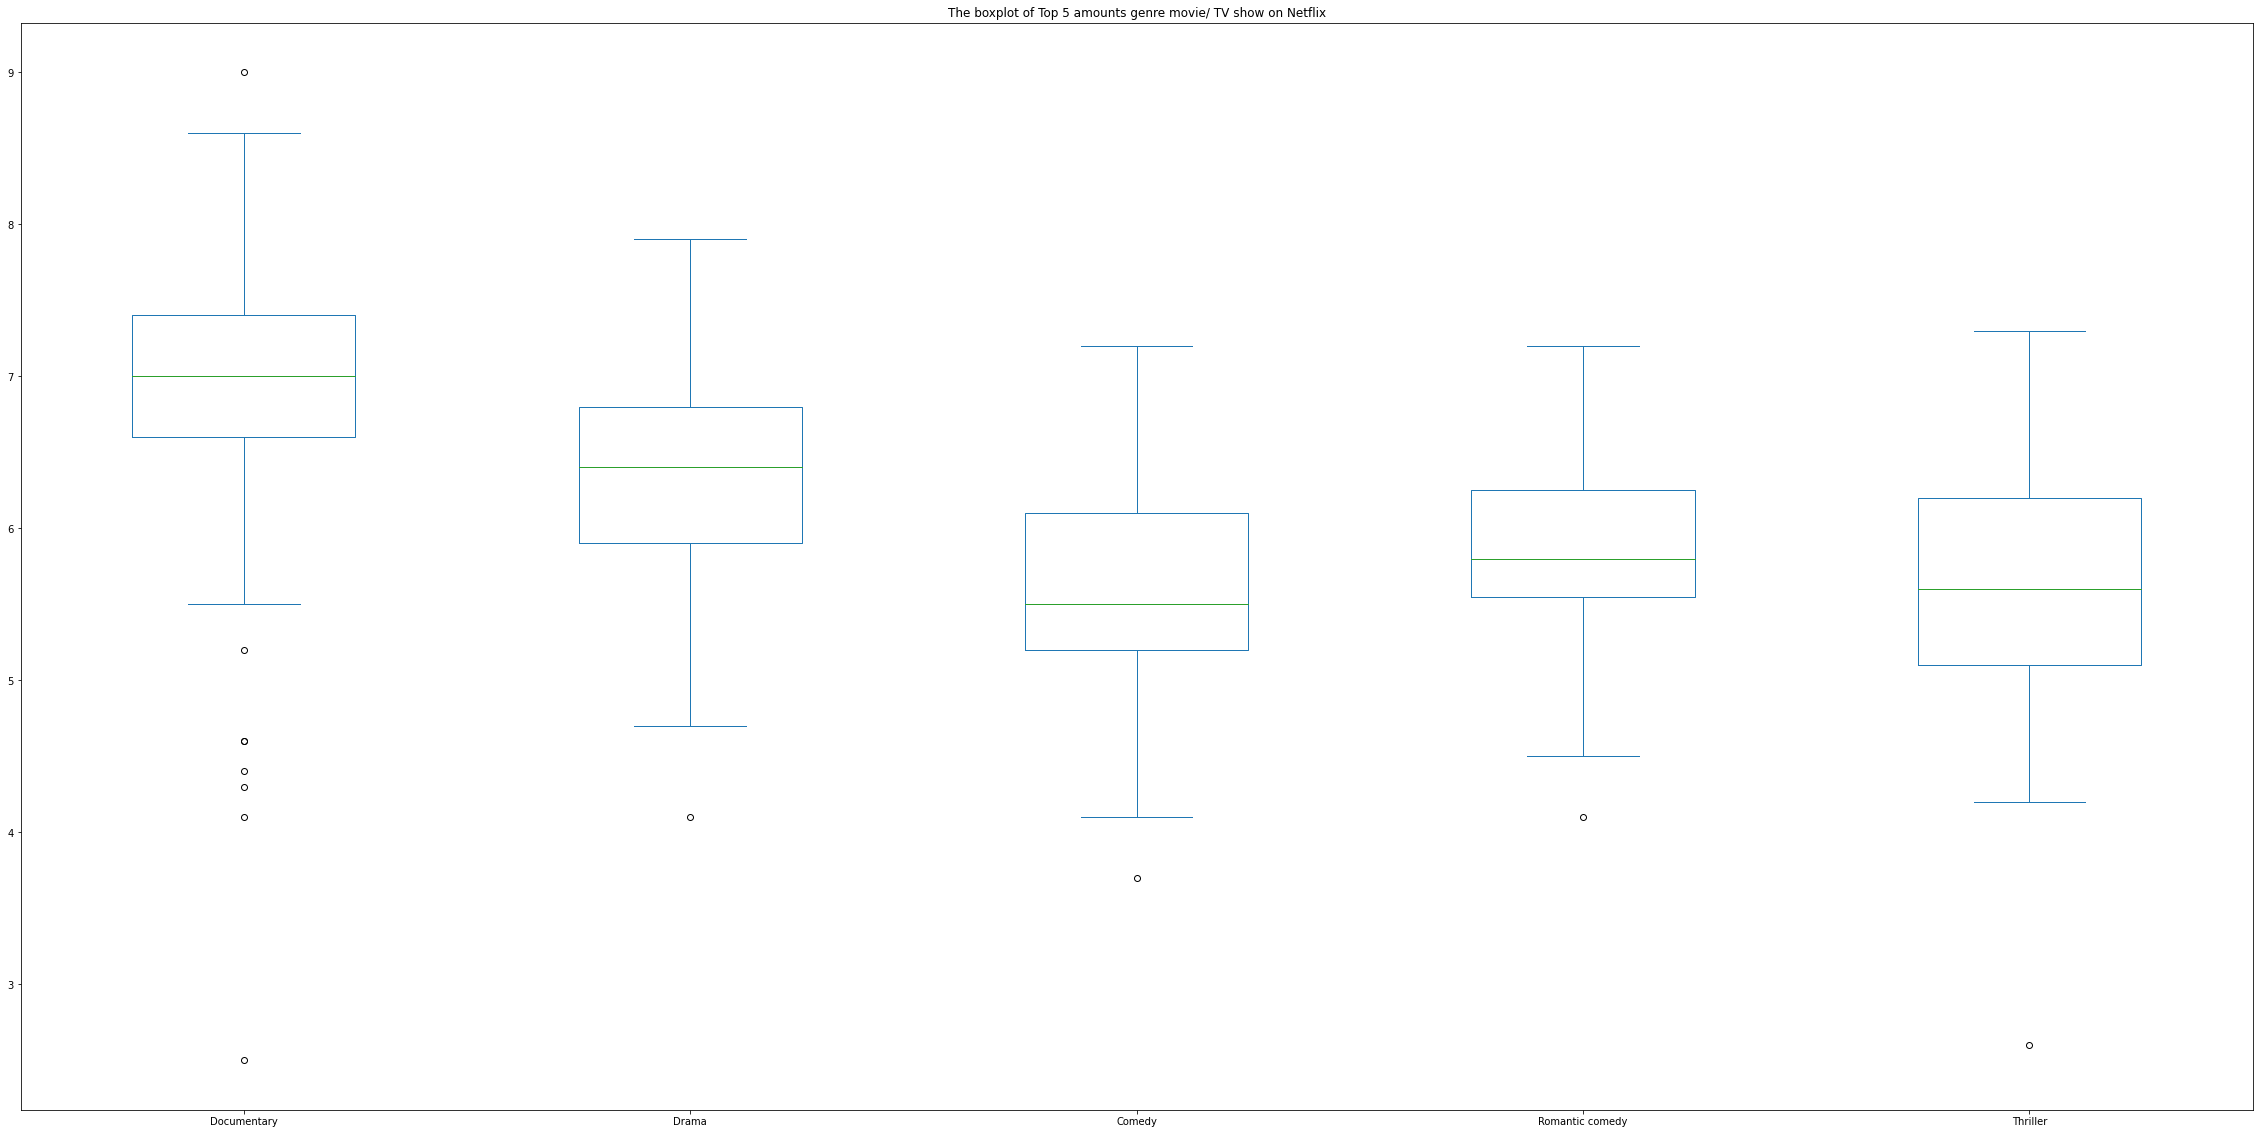

For the Q4: The movies/ TV shows’ distribution among different countries. Firstly, we input another Netflix dataset because the original dataset does not have the "country" column. And then we input the country code dataset to make our data visualization more simpler to glance.

From the plot, the world map shows the most movies and TV shows are from US which has 2421 in total.
And the number of movie/TV show in the US is far ahead of other countries. So its color in the world map is the most darkest.

The second country is IND which has 753 totally and it is out of expectation. The other main movie/TV show productions are mainly from GBR and CAN.
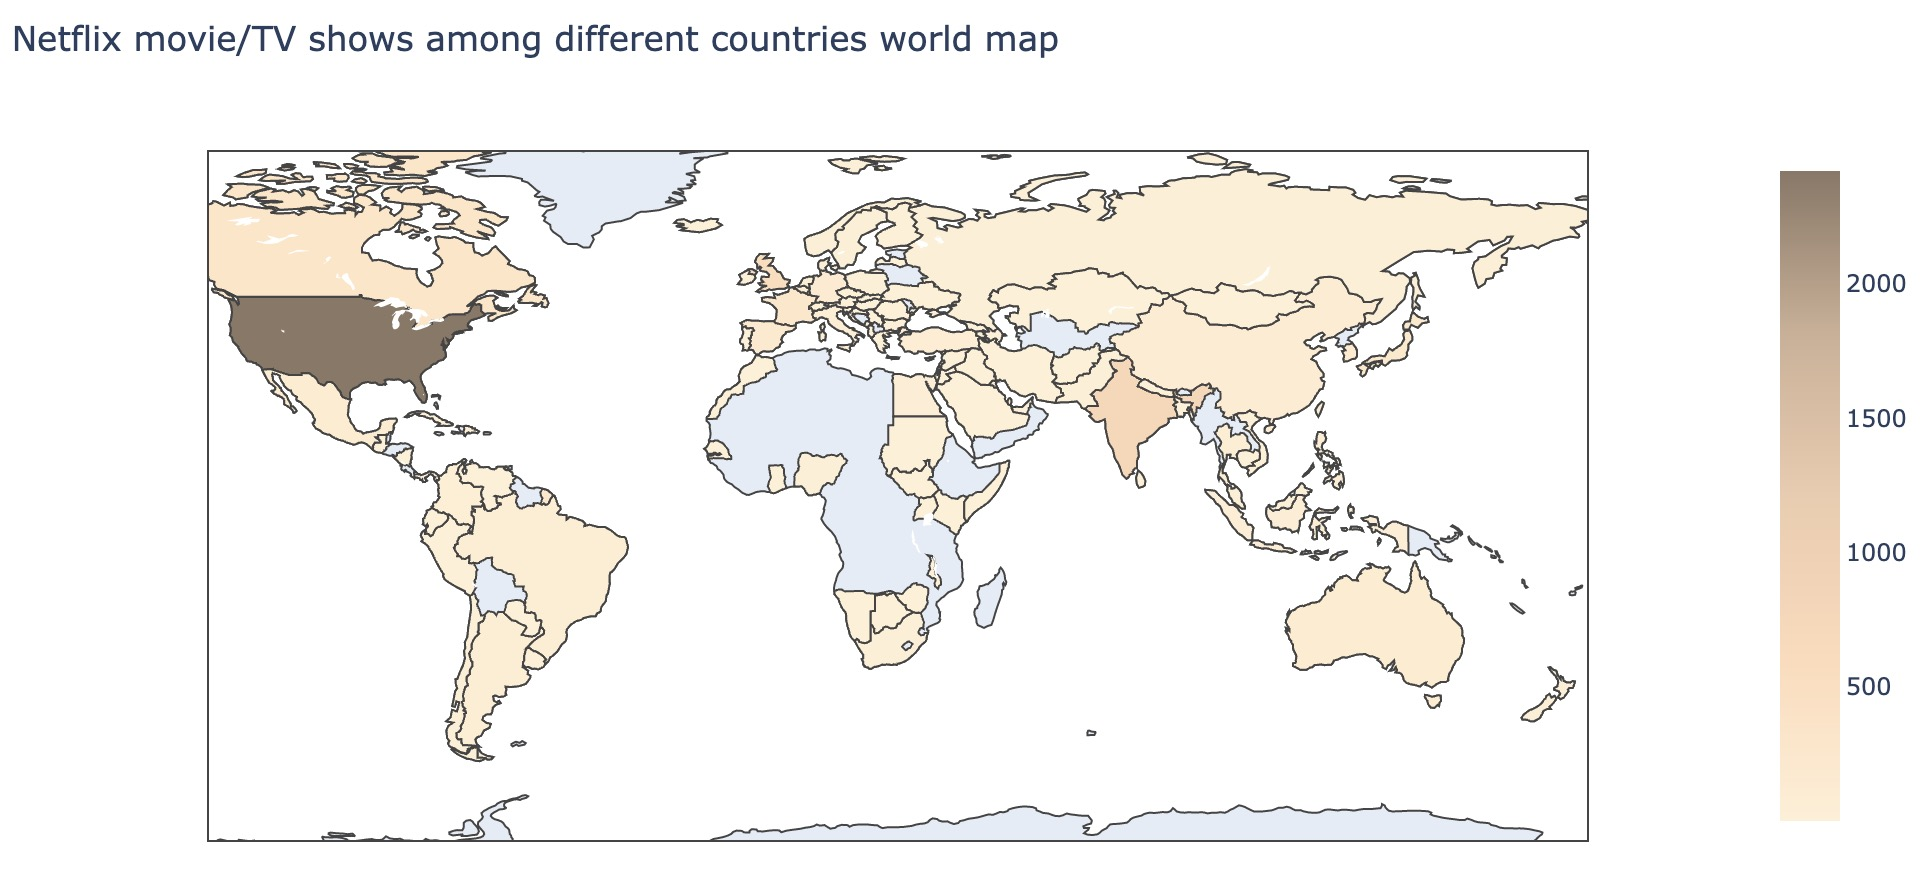
In conclusion, Netflix' main production is still from US but with Netflix is now become more and more poplular.Almost every country is trying to enter this market and want to take a piece of this pie.


# **Report**
Netflix is the biggest media streaming platform in the world. We want to visualize this topic and explore some interesting findings. And we set 4 questions for our exploration.

For the Q1, which are the top 10 genre movies/TV shows with the highset IMDB score? Firstly we should set the canvas size, then we can start processing the data. 

By finding the statistics of the occurence dict between genres and IMDB scores, we can get our results. 

From the histogram1, we can see that the top 10 genre are Concert film, Anthology, Christmas, Science Fiction, Making-of, Action adventure, comedy-drama, historical drama and one-man show.
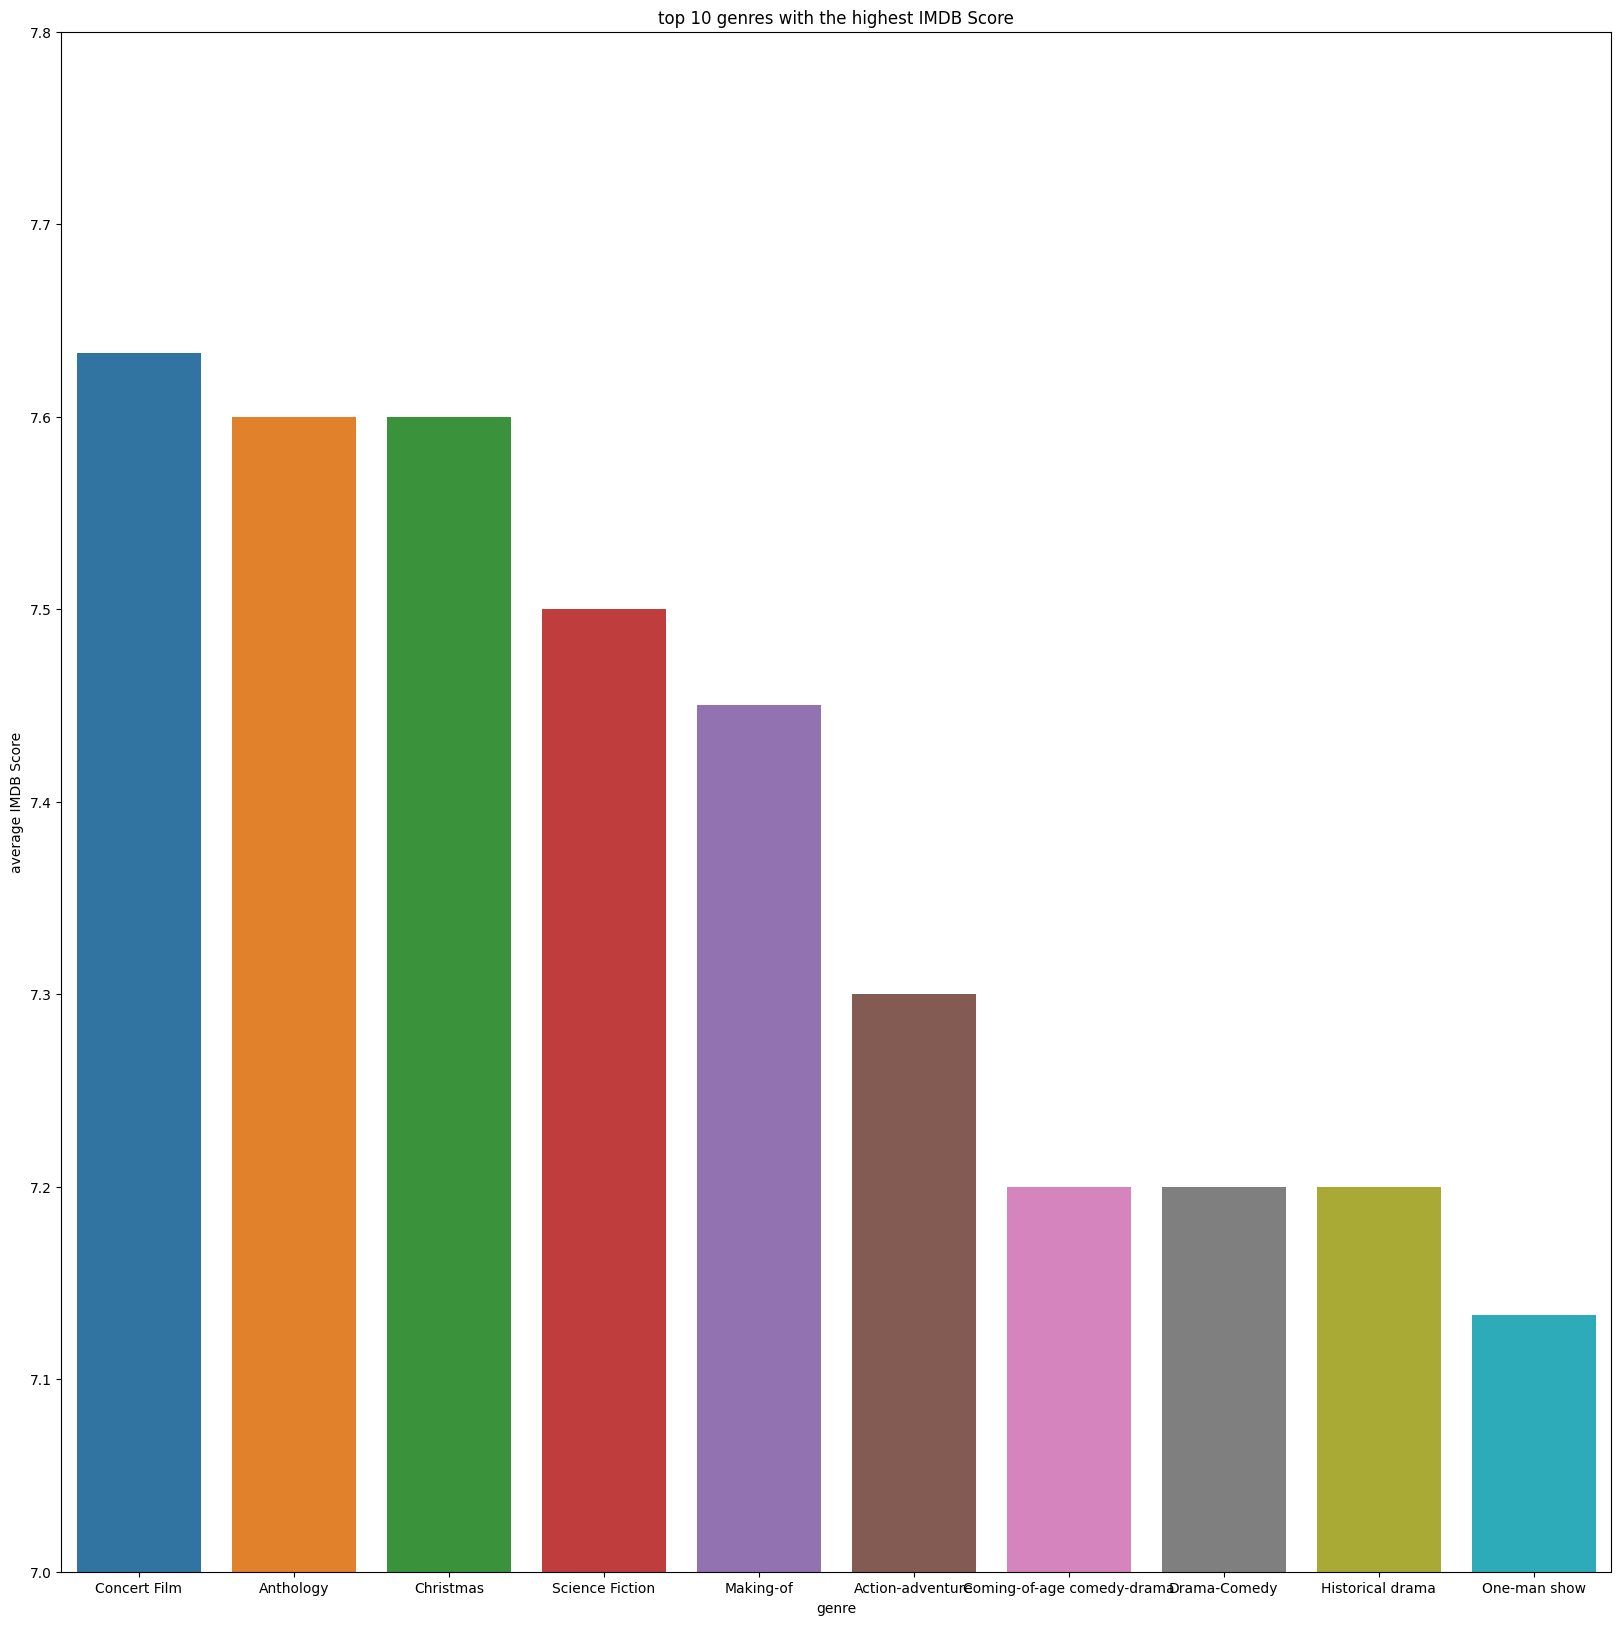
Similarly for the Q2, Which are the top 10 rating movies/ TV shows with the highest IMDB Score? After processing the data and visualization, we can see that the top10 rating are David Attenboroough, Emicida, Springsteen, Winter,Taylor Swift, Ben platt,Dacing with the birds, Cuba, Klaus and 13th.
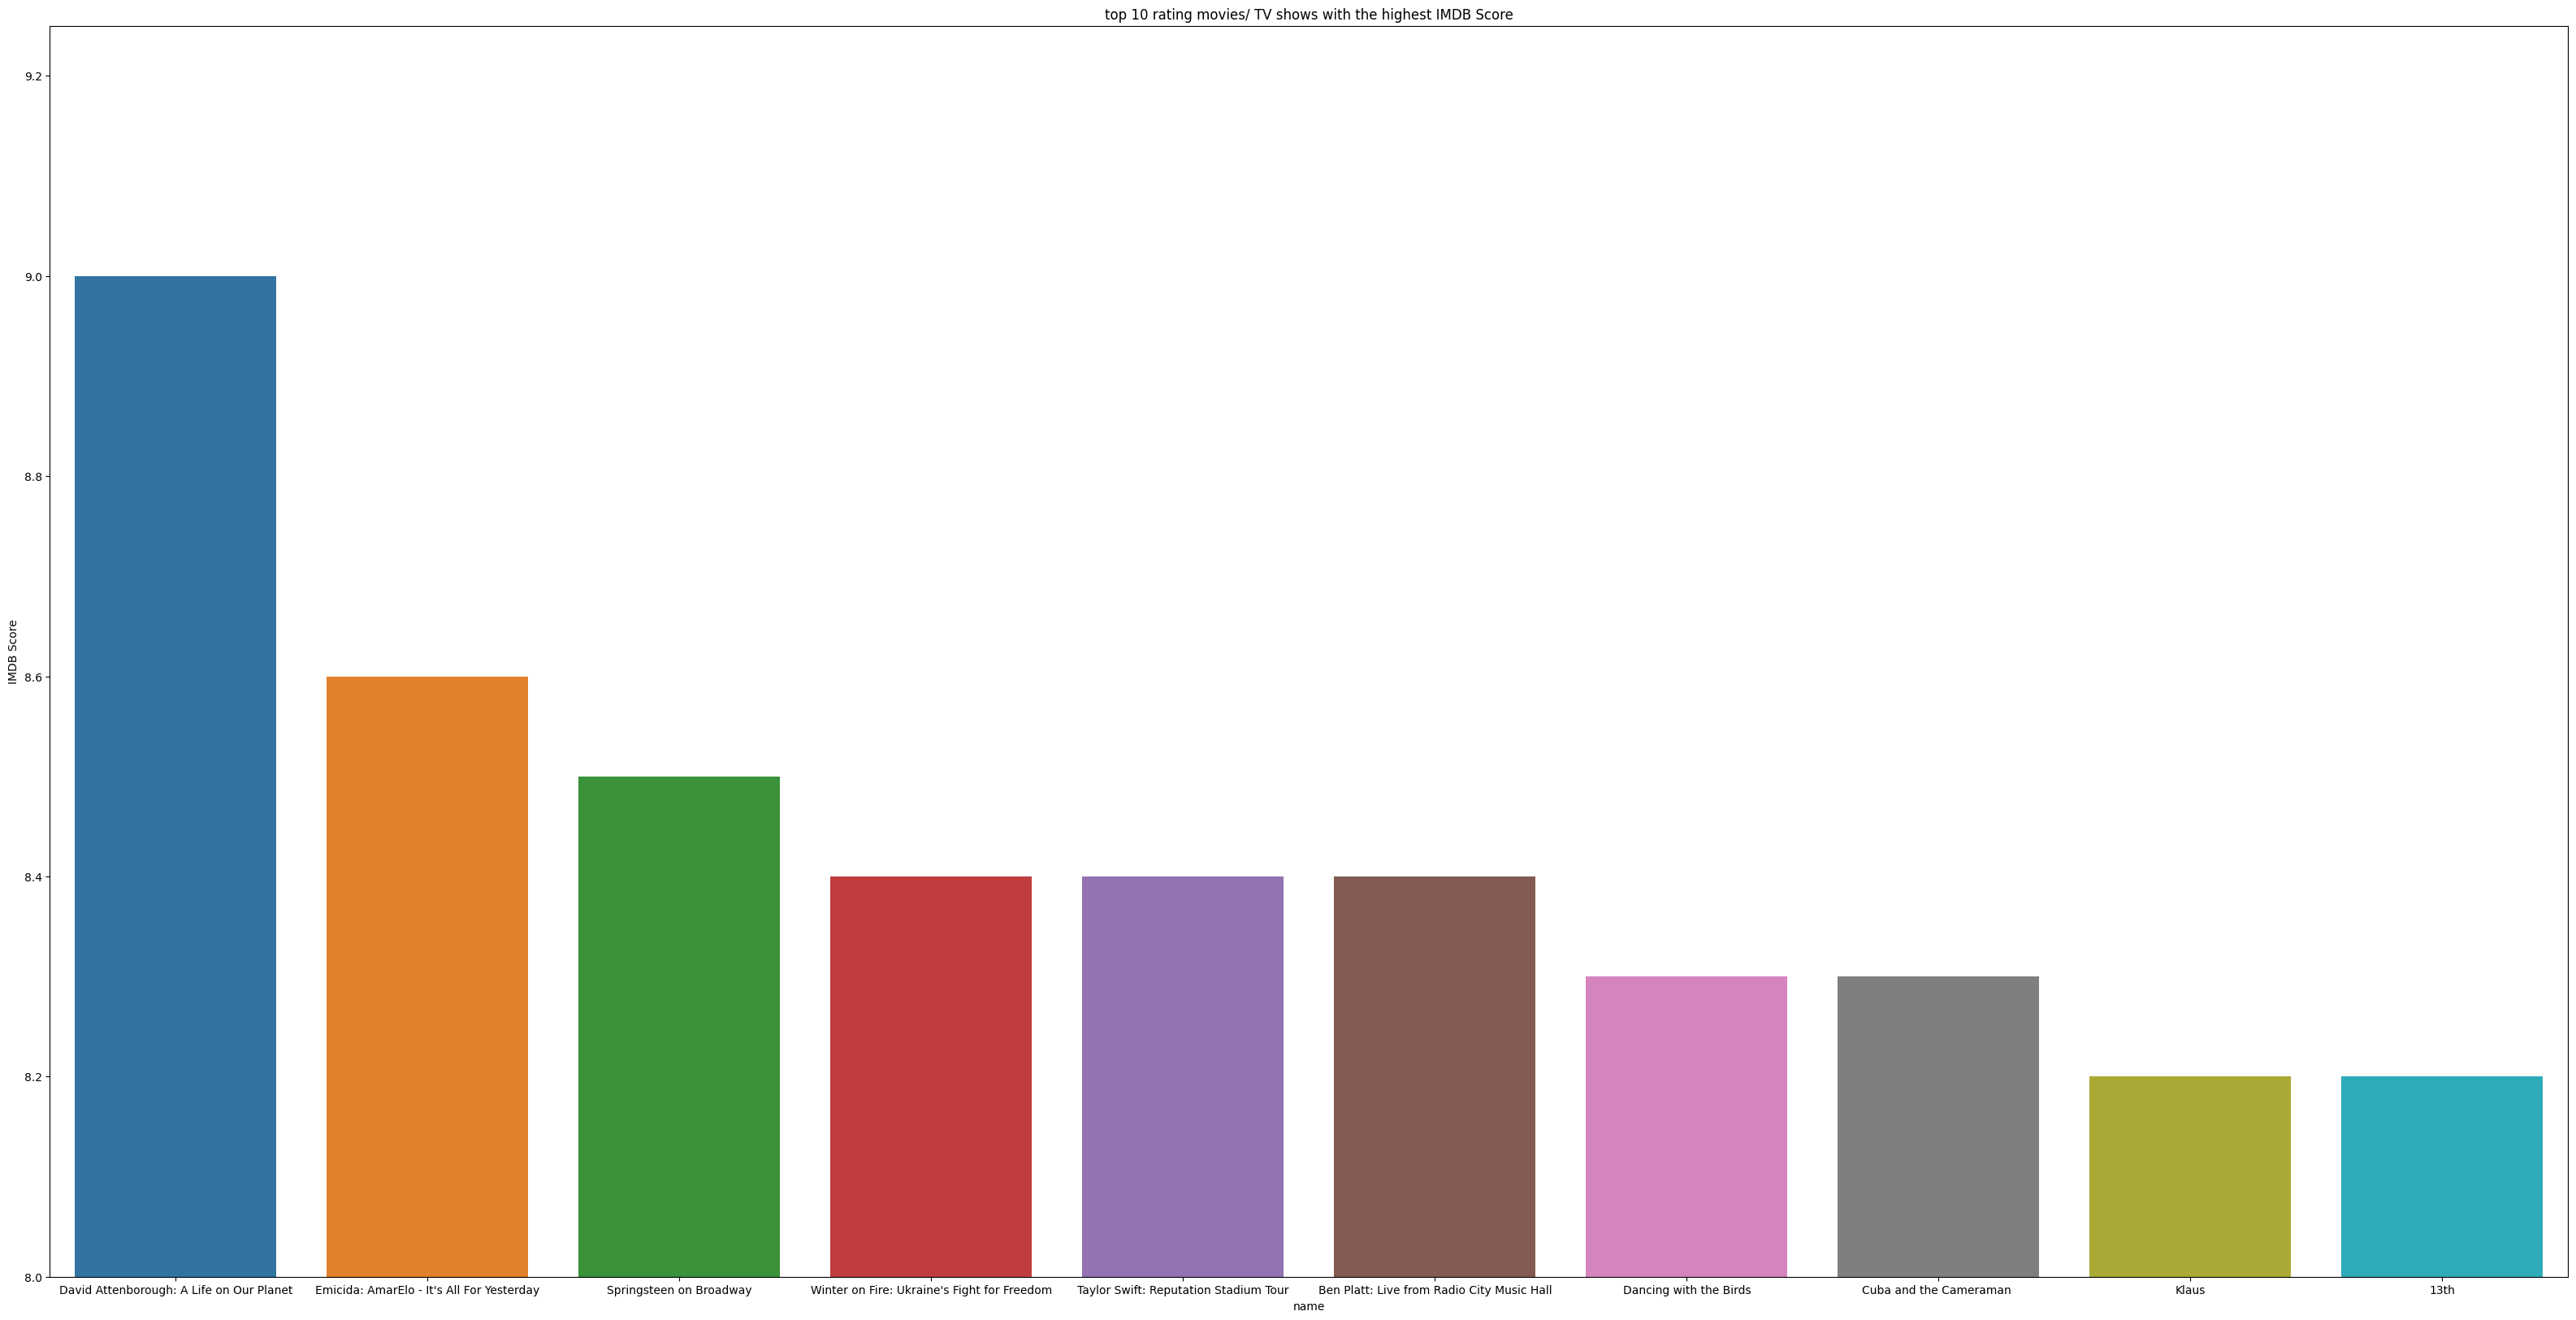

For the Q3: What is the correlation between IMDB score and 'Runtime'? It can be seen that the IMDB scores of Documentary movies are generally the highest, around 7 points. But it also has the most outliers.


Followed by drama, romantic comedy, thriller, comedy.

In conclusion, it can be seen that it is easier to get a high IMDB score for the Documentary movie category, but it will also get a low score if it is not done well. Romantic comedies are more likely to get high marks than comedies.

The three outliers in the figure are from the Documentary's IMDB score of 9 (the highest value) and 2.5 points (the lowest value) and the thriller's IMDB score of 2.6.
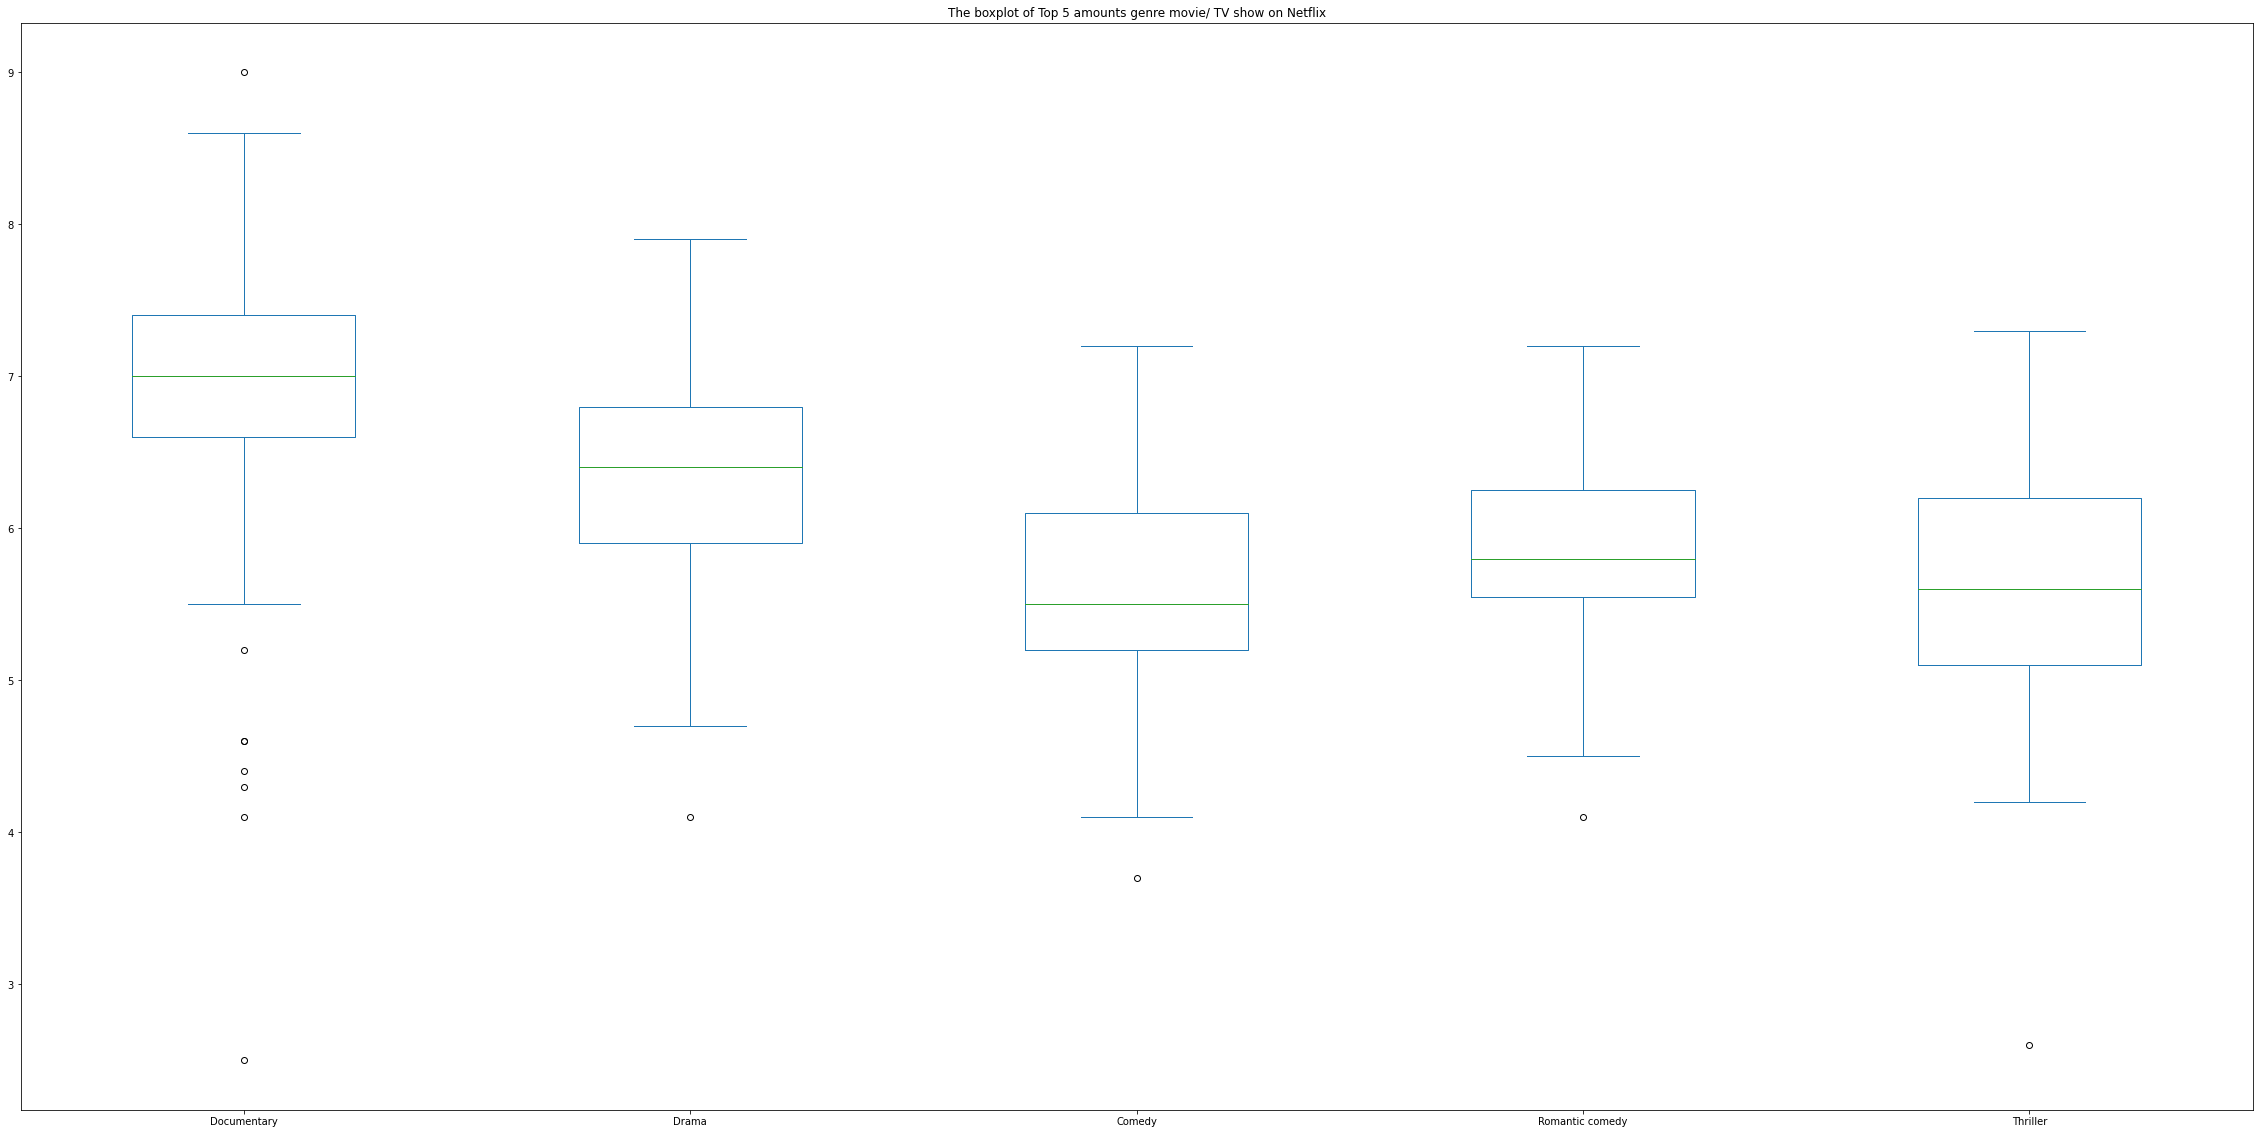

For the Q4: The movies/ TV shows’ distribution among different countries. Firstly, we input another Netflix dataset because the original dataset does not have the "country" column. And then we input the country code dataset to make our data visualization more simpler to glance.

From the plot, the world map shows the most movies and TV shows are from US which has 2421 in total.
And the number of movie/TV show in the US is far ahead of other countries. So its color in the world map is the most darkest.

The second country is IND which has 753 totally and it is out of expectation. The other main movie/TV show productions are mainly from GBR and CAN.
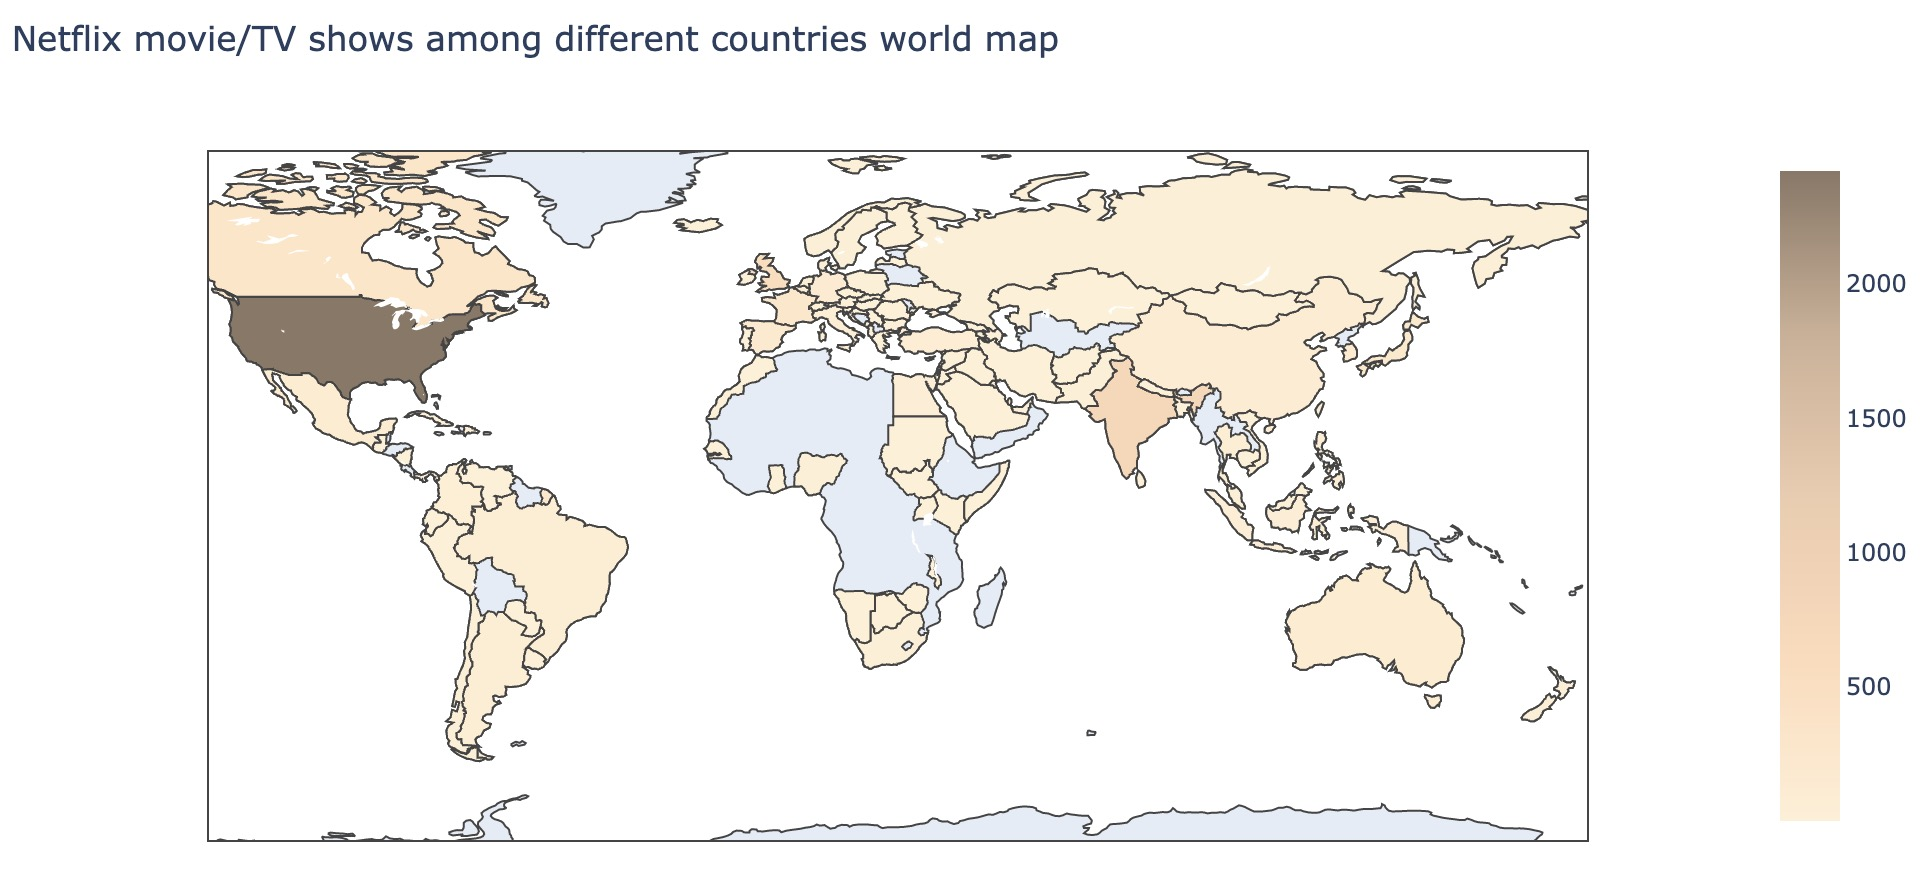
In conclusion, Netflix' main production is still from US but with Netflix is now become more and more poplular.Almost every country is trying to enter this market and want to take a piece of this pie.
